In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import sys
import csv
from scipy import sparse

In [2]:
#!cd data; tar -xzf GSE171892_RAW.tar

In [3]:
pd.set_option('display.max_rows',1000)

# Preparing heart data

In [3]:
adataH = sc.read_h5ad("data/Circulatory/global_raw.h5ad")
adataH #not normalised

AnnData object with n_obs × n_vars = 704296 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_colors', 'donor_t

In [4]:
adataH.obs['cell_or_nuclei']

barcode
HCAHeart7606896_GATGAGGCACGGCTAC                              Cell
HCAHeart7606896_CGCTTCACATTTGCCC                              Cell
HCAHeart7606896_GTTAAGCAGAGACTAT                              Cell
HCAHeart7606896_TCGCGTTGTAAGAGGA                              Cell
HCAHeart7606896_GCTGCGAGTGTTGGGA                              Cell
                                                             ...  
HCAHeartST13180619_HCAHeartST13177116_CTTGAATCAAACGGGC-1    Nuclei
HCAHeartST13180619_HCAHeartST13177116_AAAGCTTGTAGGATCC-1    Nuclei
HCAHeartST13180619_HCAHeartST13177116_AATCATCCATAATGAG-1    Nuclei
HCAHeartST13180619_HCAHeartST13177116_AGGCTAGCAGAAATGC-1    Nuclei
HCAHeartST13180619_HCAHeartST13177116_GCAAGTCGTACGGGTT-1    Nuclei
Name: cell_or_nuclei, Length: 704296, dtype: category
Categories (2, object): ['Cell', 'Nuclei']

In [5]:
adataH = adataH[adataH.obs['cell_or_nuclei'].isin(['Cell'])]

In [6]:
adataH.var[:5]

,gene_name-new,gene_name_scRNA-0-original,gene_name_snRNA-1-original,gene_name_multiome-2-original
ENSG00000243485,MIR1302-2HG,MIR1302-2HG,MIR1302-2HG,MIR1302-2HG
ENSG00000237613,FAM138A,FAM138A,FAM138A,FAM138A
ENSG00000186092,OR4F5,OR4F5,OR4F5,OR4F5
ENSG00000238009,AL627309.1,AL627309.1,AL627309.1,AL627309.1
ENSG00000239945,AL627309.3,AL627309.3,AL627309.3,AL627309.3


In [7]:
adataH.var['gene_name-new']=adataH.var['gene_name-new'].astype('object')

/var/folders/53/j9g4rwpj5jsfqf_f5l0fsbm80000gq/T/ipykernel_2347/2269308667.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adataH.var['gene_name-new']=adataH.var['gene_name-new'].astype('object')


In [8]:
adataH.var['ensemblid']=adataH.var.index
adataH.var.set_index('gene_name-new',drop=False, inplace=True)

In [9]:
adataH.var.index.name = None

In [10]:
adataH.var_names_make_unique()

In [11]:
adataH.obs['donor'].cat.categories

Index(['D1', 'D3', 'D4', 'D5', 'D6', 'D7', 'D11'], dtype='object')

In [12]:
print(pd.value_counts(adataH.obs['donor']))

donor
D6     57245
D11    45964
D7     18528
D5      6647
D3      5364
D4      1784
D1       166
Name: count, dtype: int64


In [13]:
adataH = adataH[adataH.obs['donor'].isin(['D7','D5','D3'])] #.copy()

In [14]:
adataH

View of AnnData object with n_obs × n_vars = 30539 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original', 'ensemblid'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'don

In [16]:
adataH.write_h5ad("Heart.h5ad")

In [14]:
adataH2 = sc.read_h5ad("data/Circulatory/20210204_S_SUBS4_4x_annotated_donors_UMI_counts_HCA.h5ad")

In [15]:
adataH2

AnnData object with n_obs × n_vars = 66003 × 24074
    obs: 'batch', 'library', 'donor', 'organ'
    var: 'gene_ids'

In [16]:
adataH2.obs['library']

_01_AAACCTGCACGTCTCT.1.0     SIGAD9
_01_AAACCTGGTGTGACGA.1.0     SIGAD9
_01_AAACCTGGTTCCGGCA.1.0     SIGAD9
_01_AAACGGGGTCAAAGCG.1.0     SIGAD9
_01_AAAGATGCACATGACT.1.0     SIGAD9
                             ...   
_04_TTTGTTGGTGCATGAG.1.3    SIGAD12
_04_TTTGTTGGTGGACTAG.1.3    SIGAD12
_04_TTTGTTGGTTGCAACT.1.3    SIGAD12
_04_TTTGTTGTCACTACTT.1.3    SIGAD12
_04_TTTGTTGTCACTTCTA.1.3    SIGAD12
Name: library, Length: 66003, dtype: category
Categories (11, object): ['SIGAA12', 'SIGAB10', 'SIGAB12', 'SIGAC10', ..., 'SIGAE9', 'SIGAF9', 'SIGAG9', 'SIGAH9']

In [4]:
adataH2.var_names_make_unique()

In [ ]:
print(pd.value_counts(adataH2.obs['donor']))

In [22]:
cell_numbers = adataH2.obs.groupby(['donor','library', 'organ','batch']).apply(len)
cell_numbers

donor  library  organ  batch
DOD1   SIGAD9   PB     0         2591
       SIGAE9   BM     0         2874
       SIGAF9   BM     0         2821
       SIGAG9   SPL    0         2514
       SIGAH9   SPL    0         2662
DOD2   SIGAB10  BM     1         6069
       SIGAC10  SPL    1         4842
       SIGAD10  PB     1         6377
DOD3   SIGAA12  BM     2        10056
DOD4   SIGAB12  BM     3        13147
       SIGAD12  SPL    3        12050
dtype: int64

In [23]:
cell_numbers = adataH2.obs.groupby(['donor']).apply(len)
cell_numbers

donor
DOD1    13462
DOD2    17288
DOD3    10056
DOD4    25197
dtype: int64

In [5]:
adataH2 = adataH2[adataH2.obs['donor'].isin(['DOD3','DOD1','DOD2'])] #.copy()

In [6]:
adataH2

View of AnnData object with n_obs × n_vars = 40806 × 24074
    obs: 'batch', 'library', 'donor', 'organ'
    var: 'gene_ids'

In [7]:
#adataH2.write_h5ad("data/Circulatory/BloodH2.h5ad")

In [20]:
adataP = sc.read_10x_mtx('data/filtered_gene_bc_matrices/hg19/',var_names='gene_symbols',cache=True)
adataP.var_names_make_unique()
adataP

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [21]:
#adataC = {"adataH": adataH, "adataH2": adataH2, "adataP": adataP}
#adataC = ad.concat(adataC, fill_value=0,  join="outer")

In [22]:
#adataC.var_names_make_unique()

In [23]:
#adataC

# Preparing Brain Data

In [24]:
#adataB = sc.read_10x_mtx('data/Brain',var_names='gene_symbols',cache=True)
#adataB.var_names_make_unique()
#adataB

In [3]:
adataB = sc.read_h5ad("data/Brain/local2.h5ad")

In [26]:
adataB.obs['assay'].cat.categories

Index(['Smart-seq2', 'STRT-seq', '10x 3' v2', '10x 3' v3', 'CEL-seq2',
       '10x 5' v1', 'microwell-seq',
       'BD Rhapsody Whole Transcriptome Analysis'],
      dtype='object')

In [27]:
adataB

AnnData object with n_obs × n_vars = 338564 × 28045
    obs: 'author', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'stage', 'location', 'sector', 'sample', 'celltype_original', 'iCNV', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'KI_67', 'chr1p19q', 'PDGFR', 'suspension_type', 'donor_id', 'annotation_level_3', 'annotation_level_4', 'annotation_level_2', 'annotation_level_1', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'X_approximate_distribution', 'batch

In [28]:
#adataB = adataB[adataB.obs['assay'].str.contains('10x')]

In [ ]:
test=adataB.X[-30:-1, -30:-1]
test.toarray()

In [30]:
#adataB.var['hello']='hello'

In [31]:
adataB.var[:5]

,feature_types,genome,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection,feature_is_filtered,feature_name,feature_reference,feature_biotype
ENSG00000269696,Gene Expression,unknown,False,0.003532,0.110662,-0.164165,0,False,False,ZNF470-DT,NCBITaxon:9606,gene
ENSG00000230393,Gene Expression,unknown,False,0.001288,-0.042760,-0.134143,0,False,False,AC092667.2,NCBITaxon:9606,gene
ENSG00000165244,Gene Expression,unknown,False,0.025159,0.365796,-0.224422,3,False,False,ZNF367,NCBITaxon:9606,gene
ENSG00000173597,Gene Expression,unknown,False,0.025529,0.347830,-0.185537,5,False,False,SULT1B1,NCBITaxon:9606,gene
ENSG00000158022,Gene Expression,unknown,True,0.001340,0.407240,0.454033,6,False,False,TRIM63,NCBITaxon:9606,gene


In [4]:
adataB.var['feature_name']=adataB.var['feature_name'].astype('object')

In [5]:
adataB.var['ensemblid']=adataB.var.index
adataB.var.set_index('feature_name',drop=False, inplace=True)

In [6]:
adataB.var.index.name = None

In [7]:
adataB.var_names_make_unique()

In [8]:
adataB = adataB[adataB.obs['assay'].isin(["10x 3' v2","10x 3' v3","10x 5' v1"])]

In [37]:
adataB

View of AnnData object with n_obs × n_vars = 294862 × 28045
    obs: 'author', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'stage', 'location', 'sector', 'sample', 'celltype_original', 'iCNV', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'KI_67', 'chr1p19q', 'PDGFR', 'suspension_type', 'donor_id', 'annotation_level_3', 'annotation_level_4', 'annotation_level_2', 'annotation_level_1', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'ensemblid'
    uns: 'X_approximate_

In [38]:
adataB.obs['donor_id'].cat.categories

Index(['3182', '3282', '3295', 'BT333', 'BT346', 'BT363', 'BT364', 'BT368',
       'BT389', 'BT390', 'BT397', 'BT402', 'BT407', 'BT409', 'E10', 'E37',
       'E39', 'E99', 'E100', 'G620', 'G910', 'G945', 'G946', 'G967', 'G983',
       'G1003', 'GSM4141788', 'GSM4141789', 'GSM4141790', 'MGH102', 'MGH105',
       'MGH114', 'MGH115', 'MGH118', 'MGH124', 'MGH125', 'MGH126', 'MGH143',
       'ND1', 'ND2', 'ND3', 'ND4', 'ND5', 'ND6', 'ND7', 'ND8', 'R1', 'R2',
       'R3', 'R4', 'R5', 'SF11159', 'SF11209', 'SF11215', 'SF11232', 'SF11247',
       'SF11644', 'SF11956', 'SF11979', 'SM006', 'SM011', 'SM012', 'SM017',
       'SM018'],
      dtype='object')

In [39]:
print(pd.value_counts(adataB.obs['donor_id']))

donor_id
R4            17438
BT363         11774
R2            11401
ND7           11250
G967          10858
BT364          9674
R3             9466
G1003          9376
R5             9253
SM017          8116
SF11247        8053
BT397          7517
ND8            7044
G910           6965
SM012          6890
BT346          6753
E99            6279
G983           5877
SM006          5805
E10            5538
SM011          5453
R1             5422
BT402          5388
E100           5183
BT389          5028
BT368          4894
BT407          4576
GSM4141788     4502
E37            4439
SF11644        4416
BT390          4242
GSM4141789     4116
GSM4141790     3819
SF11956        3802
ND4            3433
G946           3323
G945           3219
BT409          3142
SM018          2970
E39            2871
MGH105         2854
SF11215        2808
3295           2398
MGH124         2374
MGH143         2277
3282           2269
SF11209        1912
SF11979        1864
MGH102         1798
ND2        

In [9]:
adataB = adataB[adataB.obs['donor_id'].isin(['SM017','SF11247','R5'])] #.copy()

In [10]:
adataB

View of AnnData object with n_obs × n_vars = 25422 × 28045
    obs: 'author', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'stage', 'location', 'sector', 'sample', 'celltype_original', 'iCNV', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'KI_67', 'chr1p19q', 'PDGFR', 'suspension_type', 'donor_id', 'annotation_level_3', 'annotation_level_4', 'annotation_level_2', 'annotation_level_1', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'ensemblid'
    uns: 'X_approximate_d

In [11]:
#adataB.write_h5ad("data/Brain/BrainGlio.h5ad")

In [17]:
adataB2 = sc.read_10x_mtx('data/Brain/raw_counts_matrix/R1_N/')
adataB2.var_names_make_unique()

In [18]:
adataB3 = sc.read_10x_mtx('data/Brain/raw_counts_matrix/R2_N/')
adataB3.var_names_make_unique()

In [19]:
adataB4 = sc.read_10x_mtx('data/Brain/raw_counts_matrix/R3_N/')
adataB4.var_names_make_unique()

In [20]:
adataBZ = {"adataB2": adataB2, "adataB3": adataB3, "adataB4": adataB4,}
adataBZ = ad.concat(adataBZ, fill_value=0,  join="outer")
adataBZ.var_names_make_unique()
adataBZ.obs_names_make_unique()

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [21]:
#adataBZ.write_h5ad("data/Brain/Glioadj.h5ad")

In [46]:
adataB2

AnnData object with n_obs × n_vars = 10690 × 33538
    var: 'gene_ids'

In [47]:
adataB3

AnnData object with n_obs × n_vars = 11883 × 33538
    var: 'gene_ids'

In [48]:
adataB4

AnnData object with n_obs × n_vars = 15426 × 33538
    var: 'gene_ids'

In [49]:
#adataN = {"adataB": adataB, "adataB2": adataB2, "adataB3": adataB3, "adataB4": adataB4}
#adataN = ad.concat(adataN, fill_value=0,  join="outer")

In [50]:
#adataN.obs_names_make_unique()

In [51]:
#adataN

# Preparing Skin Data

In [94]:
adataSH = sc.read_text("data/Skin/arrayexpress_counts2.txt").T
adataSH.var_names_make_unique()

In [ ]:
metadata = pd.read_csv('data/Skin/arrayexpress_metadata.txt', delimiter = '\t',index_col=0)
metadata

In [108]:
list(adataSH.obs.index[adataSH.obs.index.isin(metadata.index)]) == list(metadata.index)

True

In [ ]:
# if above is false

# swap the metadata to the data
#metadata = metadata[adataSH.obs.index]

# swap the data to match the metadata
#adataSH = adataSH[metadata.index]

In [109]:
adataSH.obs = metadata.copy()

In [113]:
adataSH.obs

,SampleID,Sample,Tissue_layer,Flow_gate,Cell_group,Cell_type
s1_Derm_Fibro_AAACCTGAGACTCGGA,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
s1_Derm_Fibro_AAACCTGCAAAGGCGT,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
s1_Derm_Fibro_AAACGGGTCCAGTAGT,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
s1_Derm_Fibro_AAAGATGAGAGGACGG,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
s1_Derm_Fibro_AAAGATGGTTCCGGCA,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
...,...,...,...,...,...,...
s3_Derm_Mac_DC_ACACCCTAGCGTAATA,4820STDY7389010,s3,Dermis,Dermal myeloid,pDC,pDC
s1_Derm_Mac_DC_AGATTGCCATCAGTCA,4820STDY7388994,s1,Dermis,Dermal myeloid,Dermal APC,Migratory cDC
s3_Derm_Mac_DC_TATGCCCGTGTGAAAT,4820STDY7389010,s3,Dermis,Dermal myeloid,Dermal APC,moDC1
s1_Derm_Mac_DC_CACAGGCTCAACGGGA,4820STDY7388994,s1,Dermis,Dermal myeloid,Dermal APC,Migratory cDC


In [112]:
adataSH.var.index.name = None
adataSH.obs.index.name = None

Max count: 13985.0
min count: 0.0


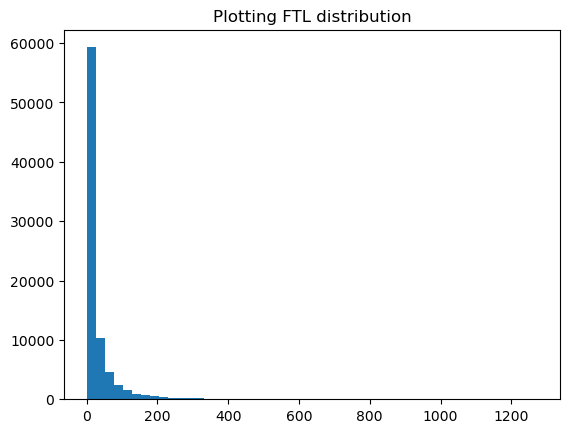

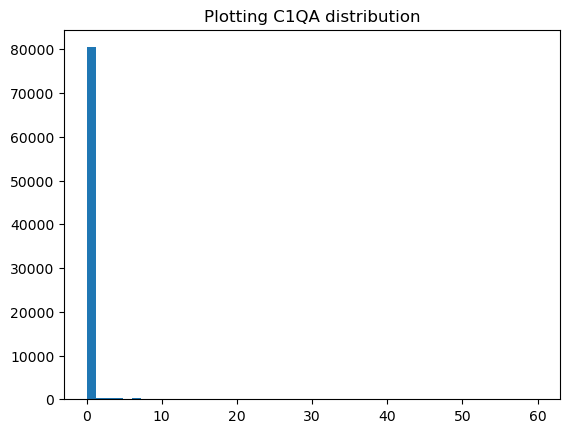

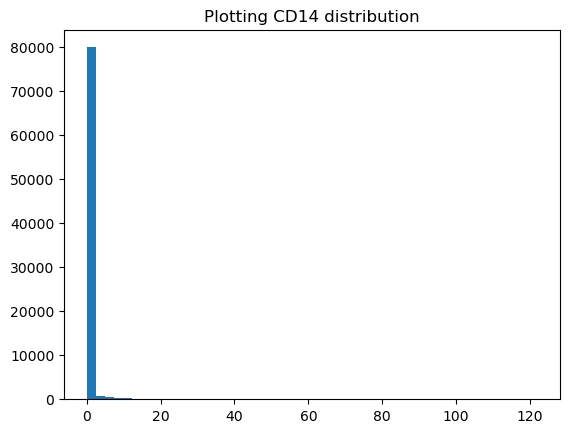

In [92]:
genes = ['FTL','C1QA','CD14']

for i, gene in enumerate(genes):

    index = np.where(adataSH.var_names == gene) [0][0]
    
    data1 = pd.DataFrame(adataSH.X[:, index].todense())
    data1.rename(columns={data1.columns[0]: gene}, inplace=True)
    if i == 0:
        print('Max count: {m}'.format(m=np.max(adataSH.X)))
        print('min count: {m}'.format(m=np.min(adataSH.X)))
    plt.hist(data1.loc[:, gene], bins=50)
    plt.title(f'Plotting {gene} distribution')
    plt.show()
    plt.close()

In [117]:
print(pd.value_counts(adataSH.obs['Sample']))

Sample
s1    41984
s2    24381
s3    15863
Name: count, dtype: int64


In [118]:
adataSH = adataSH[adataSH.obs['Sample'].isin(["s2","s3"])]

In [119]:
adataSH

View of AnnData object with n_obs × n_vars = 40244 × 23310
    obs: 'SampleID', 'Sample', 'Tissue_layer', 'Flow_gate', 'Cell_group', 'Cell_type'

In [120]:
#adataSH.write_h5ad("data/Skin/HaniffaSkin.h5ad")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying

In [56]:
#adataS = sc.read_10x_mtx('data/Skin/skinfiltered',var_names='gene_symbols',cache=True)
#adataS.var_names_make_unique()
#adataS

In [57]:
#adataS1 =sc.read("data/Skin/GSM3717038_10X2-data.HFU14.tsv",delimiter='\t',cache=True)
#adataS1 = adataS1.transpose()
#adataS1.var_names_make_unique()
#adataS1

In [58]:
#adataS1.var['genes']= adataS1.var.index
#adataS1.var

In [59]:
#new_list = [str(i).replace( 'hg19_', '') for i in adataS1.var['genes']]
#new_list
#adataS1.var.index = new_list#

In [60]:
#adataS1.var

In [61]:
#adataS2 =sc.read("data/Skin/GSM3717037_10X1data.HFU13.tsv",delimiter='\t',cache=True)
#adataS2 = adataS2.transpose()
#adataS2.var_names_make_unique()
#adataS2

In [62]:
#adataS2.var['genes']= adataS2.var.index
#adataS2.var

In [63]:
#new_list2 = [str(i).replace( 'hg19_', '') for i in adataS2.var['genes']]
#new_list2
#adataS2.var.index = new_list2

In [64]:
#adataS2.var

In [65]:
#adataSZ = {"adataS1": adataS1, "adataS2": adataS2}
#adataSZ= ad.concat(adataSZ, fill_value=0,  join="outer")
#adataSZ.var_names_make_unique()
#adataSZ.var_names_make_unique()

In [66]:
#adataS = {"adataS": adataS, "adataS1": adataS1, "adataS2": adataS2}
#adataS= ad.concat(adataS, fill_value=0,  join="outer") 

In [67]:
#adataS.var_names_make_unique()

In [68]:
#adataS.obs_names_make_unique()

In [69]:
#adataS

# Preparing Musco Data

In [31]:
adataM = sc.read_text("data/Musco/GSE143704_DeMicheli_HumanMuscleAtlas_rawdata.txt")
adataM #not normalised

AnnData object with n_obs × n_vars = 21703 × 22058

In [32]:
adataM = adataM.transpose()

In [33]:
adataM

AnnData object with n_obs × n_vars = 22058 × 21703

In [73]:
adataM.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
adataM.var[:5]

""
RP11-34P13.7
FO538757.2
AP006222.2
RP4-669L17.10
RP11-206L10.9


In [34]:
adataM.var_names_make_unique()

In [35]:
#adataM.write_h5ad("data/Skin/Musco.h5ad")

In [36]:
adataM1 = sc.read_10x_mtx('data/Musco/donor1/')
adataM1.var_names_make_unique()
adataM1

AnnData object with n_obs × n_vars = 2462 × 33538
    var: 'gene_ids'

In [37]:
adataM2 = sc.read_10x_mtx('data/Musco/donor2/')
adataM2.var_names_make_unique()
adataM2

AnnData object with n_obs × n_vars = 4777 × 33538
    var: 'gene_ids'

In [38]:
adataM3 = sc.read_10x_mtx('data/Musco/donor2/')
adataM3.var_names_make_unique()
adataM3

AnnData object with n_obs × n_vars = 4777 × 33538
    var: 'gene_ids'

In [39]:
adataMZ= {"adataM1": adataM1, "adataM2": adataM2, "adataM3": adataM3}
adataMZ= ad.concat(adataMZ, fill_value=0,  join="outer")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [40]:
adataMZ.var_names_make_unique()
adataMZ.obs_names_make_unique()

In [41]:
#adataMZ.write_h5ad("data/Skin/MuscoMZ.h5ad")

In [81]:
#adataM = {"adataM": adataM, "adataM1": adataM1, "adataM2": adataM2, "adataM3": adataM3}
#adataM= ad.concat(adataM, fill_value=0,  join="outer")

In [82]:
#adataM.obs_names_make_unique()
#adataM

# Merging by study

In [ ]:
adatas = {"Heart": adataH,"Blood":adataH2,"PBMC":adataP, "Brain-PerrpheralTumour": adataB, "BrainGlio": adataBZ, "SkinHet": adataSH,"MuscoAtlas": adataM, "MuscoB": adataMZ}
adatas = ad.concat(adatas, label="dataset_name", fill_value=0,  join="outer") #outer or inner?
adatas.var_names_make_unique()
adatas.obs_names_make_unique()

In [79]:
adatas

AnnData object with n_obs × n_vars = 176741 × 52499
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'library', 'organ', 'author', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontol

In [24]:
#adatas = [adataH, adataB]
#adatas = ad.concat(adatas, index_unique=None,fill_value=0, join="outer") 

# Merging by system

In [52]:
adatas = {"Circulatory": adataC, "Nervous": adataN, "Skin": adataS,"Musco": adataM}
adatas = ad.concat(adatas, label="dataset_name", fill_value=0,  join="outer") #outer or inner?

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [54]:
adatas

AnnData object with n_obs × n_vars = 176741 × 52499
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'library', 'organ', 'author', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontol

In [55]:
adatas.var_names_make_unique()

In [56]:
adatas.obs_names_make_unique()

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['AACAAAGAGAAACTCA-1-1', 'AACGGGACAAGTGCAG-1-1', 'AATCGACCAAGCAATA-1-1', 'AATTCCTTCGCCAGAC-1-1', 'ACAGAAACAAGGTTGG-1-1']
  warnings.warn(


# Post merged processing

In [81]:
adatas2 = adatas

In [82]:
adatas2

AnnData object with n_obs × n_vars = 176741 × 52499
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'library', 'organ', 'author', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontol

In [83]:
sc.pp.normalize_total(adatas2, target_sum=1e4)

In [84]:
sc.pp.log1p(adatas2)

In [ ]:
del adatas2.obs['GA_QCpass']

In [157]:
del adatas2.obs['CA_QCpass']

In [85]:
del adatas2.obs['ATRX']

In [86]:
del adatas2.obs['PTEN']

In [87]:
del adatas2.obs['TERT']

In [88]:
adatas2

AnnData object with n_obs × n_vars = 176741 × 52499
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'library', 'organ', 'author', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontol

In [ ]:
adatas2.write('Circulatory_Nervous_SKIN_Musco.h5ad', compression='gzip')

# Data manipulaton and location labelling

In [ ]:
#adatas2 = sc.read_h5ad("data/heart_brainnuclei.h5ad")

In [89]:
DDP = pd.read_csv("geneVSorgans.csv")

In [ ]:
#sc.pl.umap(adatas2, color='cell_type')

In [90]:
pbmcgen = adatas2.var_names.tolist()
dddgen = DDP["gene symbol"].tolist()

# Calculate the number of overlapping genes
overlap_count = len(set(pbmcgen).intersection(dddgen))

print("Number of overlapping genes:", overlap_count)

Number of overlapping genes: 2325


In [91]:
genes = list(DDP['gene symbol'])

In [92]:
# Filter rows for Skin
Skin =  DDP.loc[DDP['Skin']==True]
Skin = Skin["gene symbol"]
Skin = list(Skin)

# Filter rows for Nervous
Nervous = DDP.loc[(DDP['Peripheral'] == True) | (DDP['Brain'] == True)]
Nervous = Nervous["gene symbol"]
Nervous = list(Nervous)  

# Filter rows for Musco
Musco = DDP.loc[(DDP['Skeleton'] == True) | (DDP['Musculature'] == True)]
Musco = Musco["gene symbol"]
Musco = list(Musco)  

# Filter rows for Circulatory
Circulatory = DDP.loc[(DDP['Heart'] == True) | (DDP['Bone Marrow'] == True)]
Circulatory = Circulatory["gene symbol"]
Circulatory = list(Circulatory) 

In [93]:
dict1 = {
    'Muscoskeletal' : Musco,
}
dict2 = {
    'Skin' : Skin,
}
dict3 = {
    'Nervous' : Nervous,
}
dict4 = {
    'Circulatory' : Circulatory
}

In [94]:
dictF = {
    'Muscoskeletal' : [v for v in dict1['Muscoskeletal'] if v in adatas2.var_names],
    'Skin' : [v for v in dict2['Skin'] if v in adatas2.var_names],
    'Nervous' : [v for v in dict3['Nervous'] if v in adatas2.var_names],
    'Circulatory' : [v for v in dict4['Circulatory'] if v in adatas2.var_names]
}

In [95]:
dictN = {
    'Nervous' : [v for v in dict3['Nervous'] if v in adatas2.var_names]
}
dictS = {
    'Skin' : [v for v in dict2['Skin'] if v in adatas2.var_names]
}
dictM = {
    'Muscoskeletal' : [v for v in dict1['Muscoskeletal'] if v in adatas2.var_names]
}
dictC = {
    'Circulatory' : [v for v in dict4['Circulatory'] if v in adatas2.var_names]
}

# Plotting

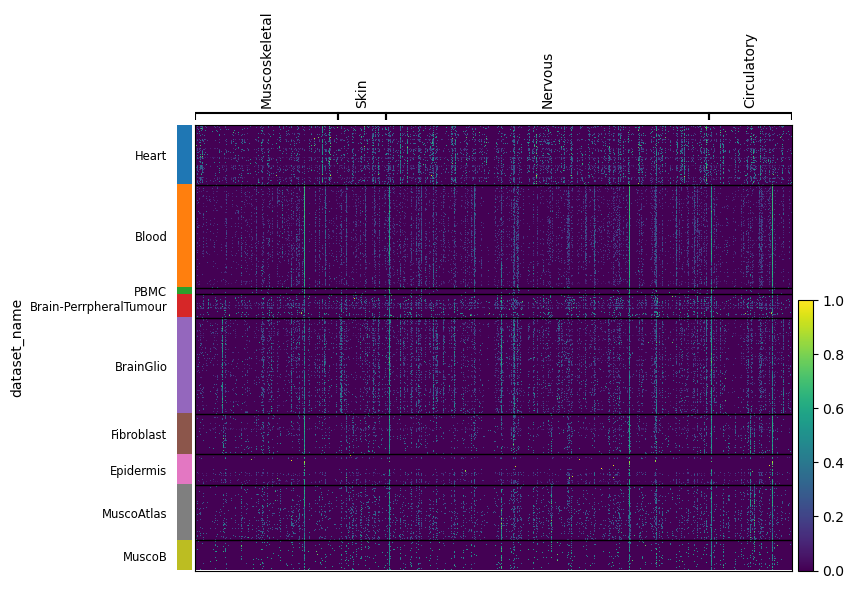

In [96]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictF, standard_scale='var',save="V7STUDYCAT.pdf")

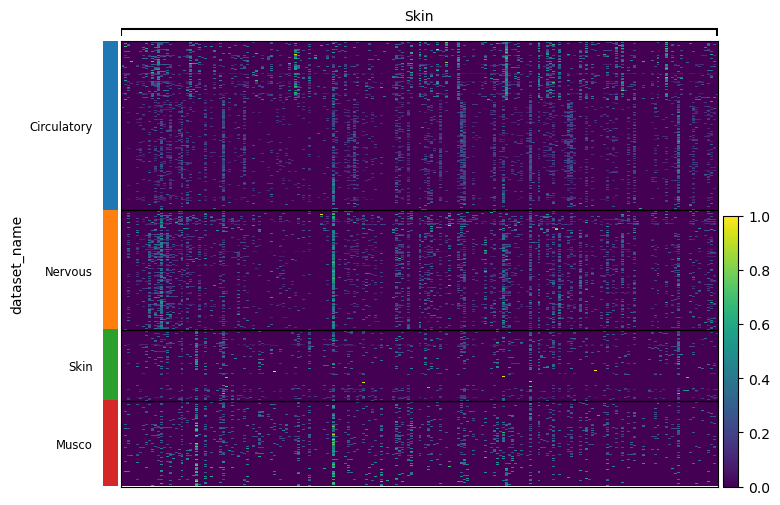

In [75]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictS, standard_scale='var', show_gene_labels=False)

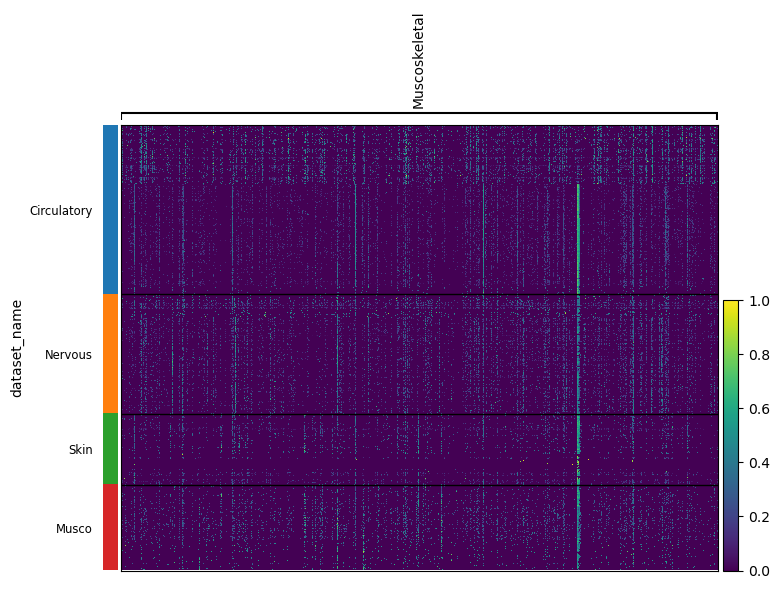

In [77]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictM, standard_scale='var', show_gene_labels=False)

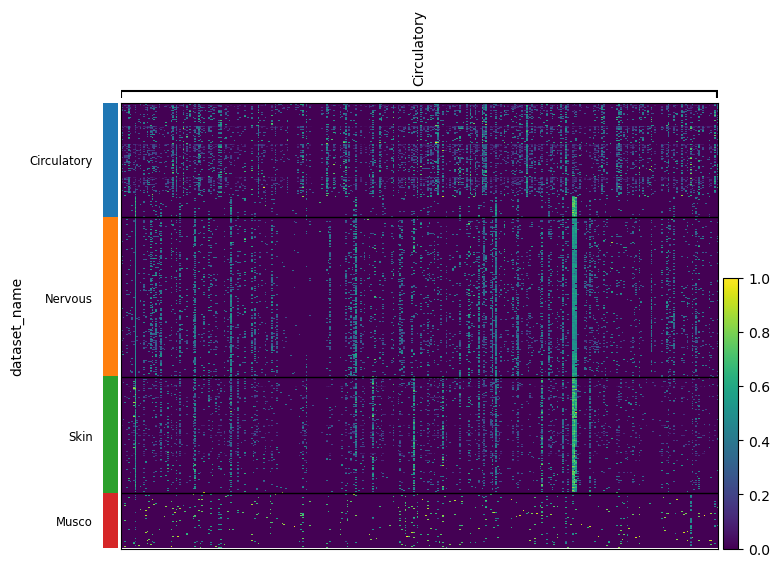

In [83]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictC, standard_scale='var', show_gene_labels=False, save="V6Circulatory.pdf")

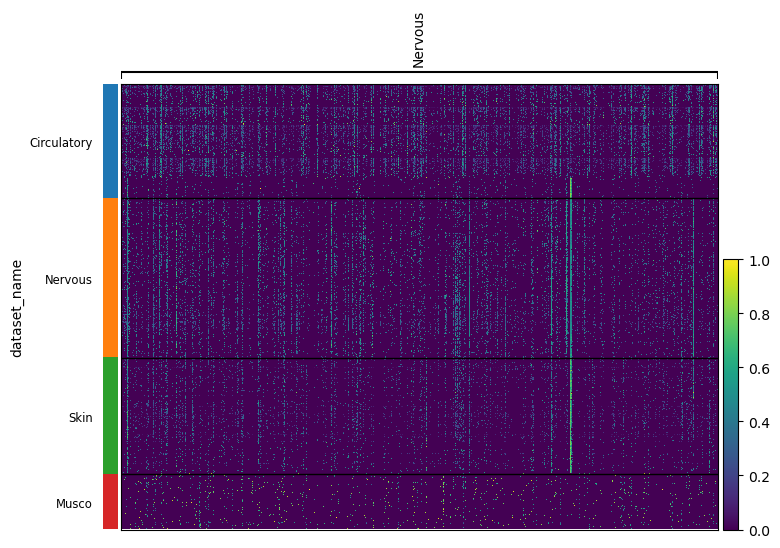

In [84]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictN, standard_scale='var', show_gene_labels=False, save="V6Nervous.pdf")

In [ ]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictF, standard_scale='var', save="V6FULLDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


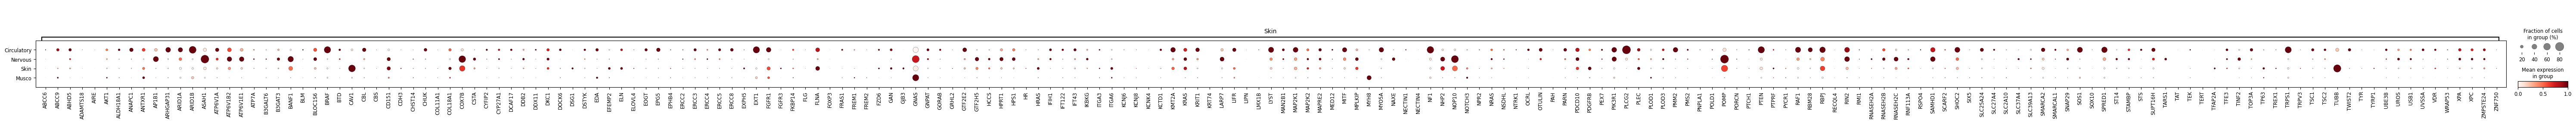

In [86]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictS, standard_scale='var', save="V6SkinDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


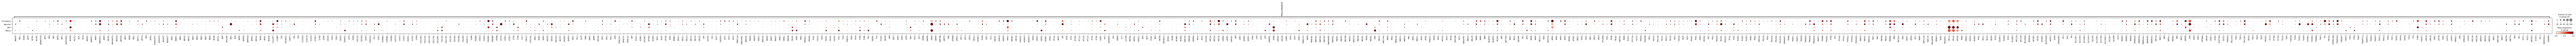

In [76]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictM, standard_scale='var')

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


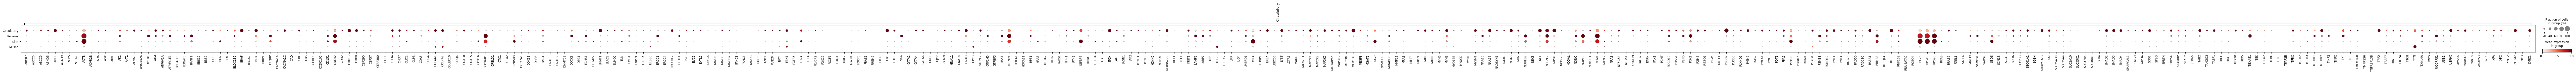

In [88]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictC, standard_scale='var', save="V6CircDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


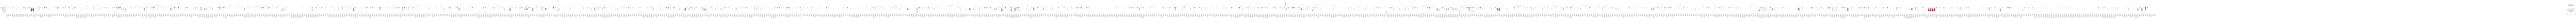

In [89]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictN, standard_scale='var', save="V6NervousDOT.pdf")